In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8333333333333334, Loss: 0.5849814238371672
Checkpoint 20, Accuracy: 0.9012345679012346, Loss: 0.4608024314597801
Checkpoint 30, Accuracy: 0.8888888888888888, Loss: 0.3840892933033131
Checkpoint 40, Accuracy: 0.9506172839506173, Loss: 0.2971467971801758
Checkpoint 50, Accuracy: 0.9506172839506173, Loss: 0.29978783925374347
Checkpoint 60, Accuracy: 0.9135802469135802, Loss: 0.27998118930392796
Checkpoint 70, Accuracy: 0.9074074074074074, Loss: 0.25789128409491646
Checkpoint 80, Accuracy: 0.9629629629629629, Loss: 0.1959202731097186
Checkpoint 90, Accuracy: 0.9506172839506173, Loss: 0.1871278197677047
Checkpoint 100, Accuracy: 0.9691358024691358, Loss: 0.15083463103682906
Checkpoint 110, Accuracy: 0.9629629629629629, Loss: 0.13961880295364945
Checkpoint 120, Accuracy: 0.9691358024691358, Loss: 0.135145867312396
Checkpoint 130, Accuracy: 0.9753086419753086, Loss: 0.11593937873840332
Checkpoint 140, Accuracy: 0.9753086419753086, Loss: 0.10618580712212457
Checkpoin

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.14169963 0.85603476 0.00226569]
[0. 1. 0.] <-> [7.2422465e-03 9.9248308e-01 2.7469374e-04]
[1. 0. 0.] <-> [0.9954346  0.00128963 0.00327571]
[1. 0. 0.] <-> [0.9943921  0.00117379 0.00443416]
[1. 0. 0.] <-> [0.9892847  0.001144   0.00957122]
[1. 0. 0.] <-> [0.98806363 0.00184735 0.01008903]
[1. 0. 0.] <-> [0.97955245 0.01730873 0.0031388 ]
[1. 0. 0.] <-> [0.87648755 0.0027188  0.1207936 ]
[1. 0. 0.] <-> [0.9970938  0.00121849 0.00168773]
[1. 0. 0.] <-> [0.9968143  0.00134896 0.00183673]
[1. 0. 0.] <-> [0.9966929  0.0016373  0.00166982]
[0. 1. 0.] <-> [7.242236e-03 9.924831e-01 2.746927e-04]
[0. 0. 1.] <-> [5.2541532e-03 6.3222763e-04 9.9411362e-01]
[1. 0. 0.] <-> [0.9956462  0.00161316 0.00274069]
[0. 0. 1.] <-> [0.40710402 0.00217736 0.5907187 ]
[1. 0. 0.] <-> [0.99476904 0.00100564 0.00422528]
[1. 0. 0.] <-> [0.99633235 0.00151865 0.00214908]
[1. 0. 0.] <-> [0.9958007  0.00224013 0.0019592 ]
[0. 0. 1.] <-> [4.969561e-03 6.004762e-04 9.944299e-01]
[1. 0. 0.] <-> [0.99

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

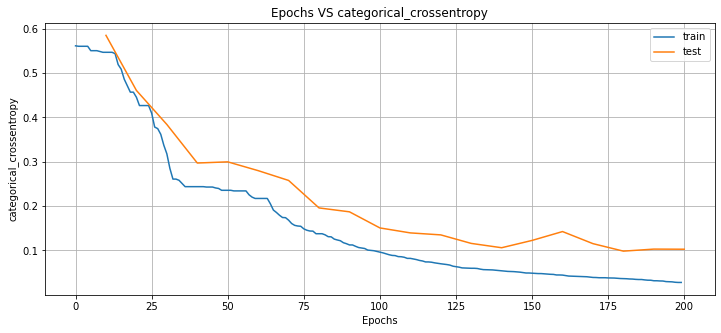

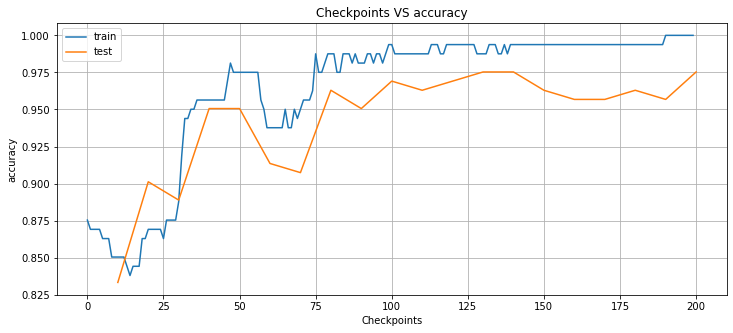

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8333333333333334, 'mean_square_error': 0.35340403770257905, 'categorical_crossentropy': 0.5849814238371672, 'essential_metrics': {0: {'tp_hit': 66, 'fp_hit': 17, 'tn_hit': 15, 'fn_hit': 10}, 1: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 16}, 2: {'tp_hit': 14, 'fp_hit': 10, 'tn_hit': 83, 'fn_hit': 1}}, 'checkpoint': 10} 


{'accuracy': 0.9012345679012346, 'mean_square_error': 0.24889946886339412, 'categorical_crossentropy': 0.4608024314597801, 'essential_metrics': {0: {'tp_hit': 71, 'fp_hit': 11, 'tn_hit': 21, 'fn_hit': 5}, 1: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 10}, 2: {'tp_hit': 14, 'fp_hit': 5, 'tn_hit': 88, 'fn_hit': 1}}, 'checkpoint': 20} 


{'accuracy': 0.8888888888888888, 'mean_square_error': 0.21812350448147233, 'categorical_crossentropy': 0.3840892933033131, 'essential_metrics': {0: {'tp_hit': 72, 'fp_hit': 14, 'tn_hit': 18, 'fn_hit': 4}, 1: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 13}, 2: {'tp_hit': 14, 'fp_hit': 4, 'tn_hit': 89,

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-1.4229168   2.6793628   2.7585075   0.22658119 -0.8181703 ]
 bias: -3.0

Neuron 1: weights:
[ 0.57750595 -3.         -1.4149164   0.3161261   0.65421885]
 bias: -3.0

Neuron 2: weights:
[ 1.7860867 -3.        -2.604707  -2.0121722  1.4019163]
 bias: 3.0

Neuron 3: weights:
[ 1.6588006  -2.2635603  -0.12738761  2.4891555   1.2603294 ]
 bias: -3.0

$
Layer 2
Neuron 0: weights:
[-3. -3.  3. -3.]
 bias: 1.8506369590759277

Neuron 1: weights:
[ 3.        -2.8298163 -3.         1.7963848]
 bias: 0.7709218859672546

Neuron 2: weights:
[-2.0113344   3.          0.56719315  3.        ]
 bias: -2.410060167312622

$

